<FONT size="6pt" color='Blue'> <center>Development of a Named Entity Recognition (NER) system</center></FONT>

### This notebook is dedicated to building a Named Entity Recognition (NER) system.

#### Importing Libraries

In [1]:
import pandas as pd
import spacy
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from spacy import displacy
import warnings
warnings.filterwarnings('ignore')
import spacy


# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm")

print("SpaCy chargé avec succès!")
print(f"Modèle: {nlp.meta['name']}")
print(f"Version: {nlp.meta['version']}")

SpaCy chargé avec succès!
Modèle: core_web_sm
Version: 3.8.0


In [2]:
import pandas as pd

- **Load the dataset from df_reviews**

In [3]:
df_reviews = pd.read_csv('df_reviews.csv')
df_reviews.head(5)


,sentiment,text,tokens,length,processed_text
0,neutral,decide eat aware going take 2 hour beginning e...,"['decide', 'eat', 'aware', 'going', 'take', '2...",277,decide eat aware going take 2 hour beginning e...
1,positive,ive taken lot spin class year nothing compare ...,"['ive', 'taken', 'lot', 'spin', 'class', 'year...",540,ive taken lot spin class year nothing compare ...
2,neutral,family diner buffet eclectic assortment large ...,"['family', 'diner', 'buffet', 'eclectic', 'ass...",260,family diner buffet eclectic assortment large ...
3,positive,wow yummy different delicious favorite lamb cu...,"['wow', 'yummy', 'different', 'delicious', 'fa...",153,wow yummy different delicious favorite lamb cu...
4,positive,cute interior owner gave u tour upcoming patio...,"['cute', 'interior', 'owner', 'gave', 'u', 'to...",380,cute interior owner gave u tour upcoming patio...


In [4]:
# Utiliser la colonne 'text' originale pour NER (plus d'informations que processed_text)
texts = df_reviews['text'].tolist()

print(f"Nombre de documents à analyser: {len(texts)}")
print(f"Exemple de texte original:")
print(f"'{texts[0][:200]}...'")

Nombre de documents à analyser: 50000
Exemple de texte original:
'decide eat aware going take 2 hour beginning end tried multiple time want like location nj never bad experience food good take long time come waitstaff young usually pleasant many experience spent way...'


In [5]:
# Utiliser la colonne 'text' originale pour NER (plus d'informations que processed_text)
texts = df_reviews['text'].tolist()

print(f"Nombre de documents à analyser: {len(texts)}")
print(f"Exemple de texte original:")
print(f"'{texts[0][:200]}...'")

Nombre de documents à analyser: 50000
Exemple de texte original:
'decide eat aware going take 2 hour beginning end tried multiple time want like location nj never bad experience food good take long time come waitstaff young usually pleasant many experience spent way...'


- **Entity extraction function**

In [6]:
def extract_entities(text):
    """
    Extraire les entités nommées d'un texte
    """
    doc = nlp(text)
    entities = []
    
    for entity in doc.ents:
        entities.append({
            'text': entity.text,
            'label': entity.label_,
            'description': spacy.explain(entity.label_),
            'start': entity.start_char,
            'end': entity.end_char
        })
    
    return entities

# Test sur un exemple
sample_text = texts[0]
sample_entities = extract_entities(sample_text)

print("Exemple d'extraction d'entités:")
print(f"Texte: {sample_text[:100]}...")
print("\nEntités trouvées:")
for entity in sample_entities:
    print(f"- {entity['text']} ({entity['label']}) - {entity['description']}")

Exemple d'extraction d'entités:
Texte: decide eat aware going take 2 hour beginning end tried multiple time want like location nj never bad...

Entités trouvées:
- 2 hour (TIME) - Times smaller than a day


- **Entity extraction from all texts**

In [7]:
print("Extraction des entités en cours...")

all_entities = []
text_entities = []  # Pour chaque texte, stocker ses entités

for i, text in enumerate(texts):
    entities = extract_entities(text)
    text_entities.append(entities)
    all_entities.extend(entities)
    
    if (i + 1) % 100 == 0:
        print(f"Traité {i + 1}/{len(texts)} textes")

print(f"\nExtraction terminée!")
print(f"Total d'entités extraites: {len(all_entities)}")

# Ajouter les entités au DataFrame
df_reviews['entities'] = text_entities
df_reviews['num_entities'] = [len(entities) for entities in text_entities]

Extraction des entités en cours...
Traité 100/50000 textes
Traité 200/50000 textes
Traité 300/50000 textes
Traité 400/50000 textes
Traité 500/50000 textes
Traité 600/50000 textes
Traité 700/50000 textes
Traité 800/50000 textes
Traité 900/50000 textes
Traité 1000/50000 textes
Traité 1100/50000 textes
Traité 1200/50000 textes
Traité 1300/50000 textes
Traité 1400/50000 textes
Traité 1500/50000 textes
Traité 1600/50000 textes
Traité 1700/50000 textes
Traité 1800/50000 textes
Traité 1900/50000 textes
Traité 2000/50000 textes
Traité 2100/50000 textes
Traité 2200/50000 textes
Traité 2300/50000 textes
Traité 2400/50000 textes
Traité 2500/50000 textes
Traité 2600/50000 textes
Traité 2700/50000 textes
Traité 2800/50000 textes
Traité 2900/50000 textes
Traité 3000/50000 textes
Traité 3100/50000 textes
Traité 3200/50000 textes
Traité 3300/50000 textes
Traité 3400/50000 textes
Traité 3500/50000 textes
Traité 3600/50000 textes
Traité 3700/50000 textes
Traité 3800/50000 textes
Traité 3900/50000 textes

- **Statistical analysis of entities**

=== DISTRIBUTION DES TYPES D'ENTITÉS ===
CARDINAL: 45005 (Numerals that do not fall under another type)
DATE: 19801 (Absolute or relative dates or periods)
TIME: 14574 (Times smaller than a day)
PERSON: 12305 (People, including fictional)
NORP: 11733 (Nationalities or religious or political groups)
ORDINAL: 9166 ("first", "second", etc.)
GPE: 7947 (Countries, cities, states)
ORG: 7927 (Companies, agencies, institutions, etc.)
QUANTITY: 1334 (Measurements, as of weight or distance)
MONEY: 716 (Monetary values, including unit)
LOC: 592 (Non-GPE locations, mountain ranges, bodies of water)
PRODUCT: 491 (Objects, vehicles, foods, etc. (not services))
FAC: 446 (Buildings, airports, highways, bridges, etc.)
LANGUAGE: 160 (Any named language)
EVENT: 41 (Named hurricanes, battles, wars, sports events, etc.)
LAW: 35 (Named documents made into laws.)
PERCENT: 26 (Percentage, including "%")
WORK_OF_ART: 12 (Titles of books, songs, etc.)


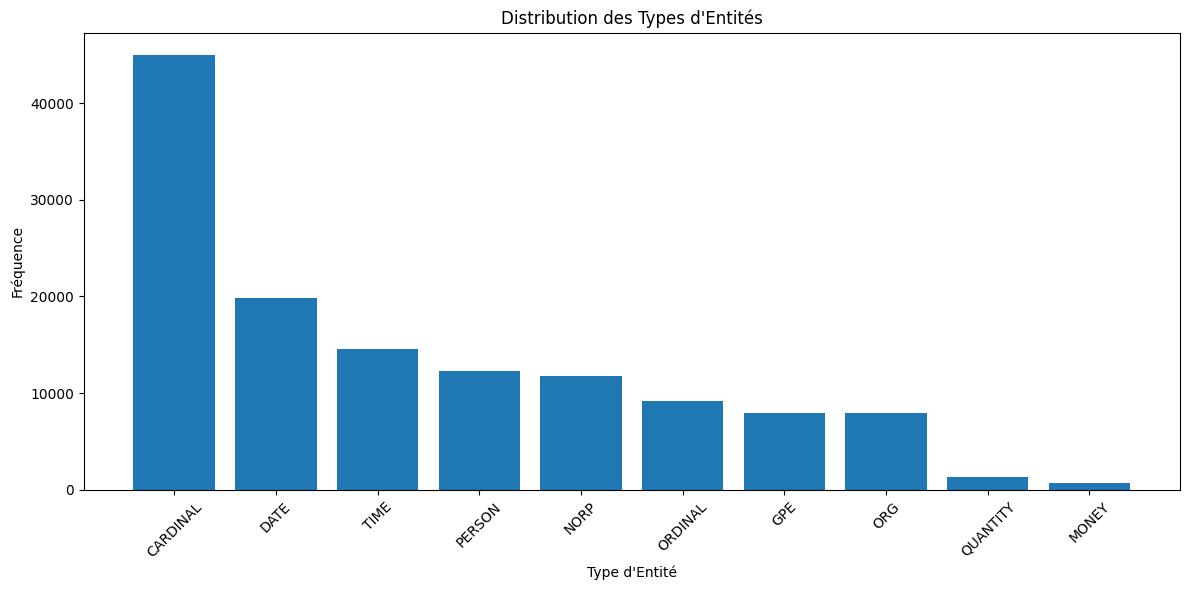

In [8]:
# Compter les types d'entités
entity_labels = [entity['label'] for entity in all_entities]
label_counts = Counter(entity_labels)

print("=== DISTRIBUTION DES TYPES D'ENTITÉS ===")
for label, count in label_counts.most_common():
    description = spacy.explain(label)
    print(f"{label}: {count} ({description})")

# Graphique de distribution
plt.figure(figsize=(12, 6))
labels, counts = zip(*label_counts.most_common(10))
plt.bar(labels, counts)
plt.title('Distribution des Types d\'Entités')
plt.xlabel('Type d\'Entité')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Extraction of specific entities (Products, Locations, Organizations)**

In [9]:
# Catégoriser les entités selon le problème demandé
def categorize_entities(entities):
    """
    Catégoriser les entités en produits, lieux, organisations
    """
    products = []
    locations = []
    organizations = []
    other = []
    
    for entity in entities:
        label = entity['label']
        text = entity['text']
        
        # Lieux (géographiques)
        if label in ['GPE', 'LOC', 'FAC']:  # Geopolitical entity, Location, Facility
            locations.append(text)
        
        # Organisations
        elif label in ['ORG']:  # Organization
            organizations.append(text)
        
        # Produits (approximation avec PRODUCT + certains NOUN)
        elif label in ['PRODUCT', 'WORK_OF_ART']:
            products.append(text)
        
        # Autres entités pertinentes (personnes, événements, etc.)
        else:
            other.append((text, label))
    
    return {
        'products': products,
        'locations': locations,
        'organizations': organizations,
        'other': other
    }

# Analyser toutes les entités
categorized = categorize_entities(all_entities)

print("=== ENTITÉS PAR CATÉGORIE ===\n")

print(f"PRODUITS ({len(categorized['products'])}):")
product_counts = Counter(categorized['products'])
for product, count in product_counts.most_common(10):
    print(f"  - {product}: {count}")

print(f"\nLIEUX ({len(categorized['locations'])}):")
location_counts = Counter(categorized['locations'])
for location, count in location_counts.most_common(10):
    print(f"  - {location}: {count}")

print(f"\nORGANISATIONS ({len(categorized['organizations'])}):")
org_counts = Counter(categorized['organizations'])
for org, count in org_counts.most_common(10):
    print(f"  - {org}: {count}")

print(f"\nAUTRES ENTITÉS IMPORTANTES:")
other_by_label = defaultdict(list)
for text, label in categorized['other']:
    other_by_label[label].append(text)

for label, texts in other_by_label.items():
    text_counts = Counter(texts)
    print(f"  {label} ({spacy.explain(label)}):")
    for text, count in text_counts.most_common(5):
        print(f"    - {text}: {count}")

=== ENTITÉS PAR CATÉGORIE ===

PRODUITS (503):
  - cole: 90
  - gooey: 54
  - diet coke: 16
  - google: 14
  - guinness: 14
  - atlantis: 11
  - cherokee: 8
  - yummy: 8
  - mosaic: 6
  - frisbee: 5

LIEUX (8985):
  - new orleans: 1150
  - santa barbara: 414
  - philadelphia: 413
  - chicago: 311
  - nacho: 300
  - california: 270
  - taco: 204
  - florida: 196
  - new york: 176
  - texas: 160

ORGANISATIONS (7927):
  - taco: 509
  - toyota: 73
  - taco bell: 71
  - fed: 66
  - mayo: 60
  - ac: 57
  - nola: 48
  - gm: 48
  - strawberry: 43
  - caramel: 39

AUTRES ENTITÉS IMPORTANTES:
  TIME (Times smaller than a day):
    - night: 1051
    - hour: 939
    - evening: 657
    - morning: 638
    - last night: 599
  CARDINAL (Numerals that do not fall under another type):
    - one: 9693
    - two: 4358
    - 2: 2704
    - 3: 2214
    - 5: 2177
  NORP (Nationalities or religious or political groups):
    - french: 1461
    - mexican: 1224
    - italian: 1141
    - thai: 1086
    - chinese:

- **Visualizing Named Entities with displaCy**

In [11]:
# Visualiser quelques exemples avec displaCy
def visualize_entities(text, title=""):
    """
    Visualiser les entités d'un texte avec displaCy
    """
    doc = nlp(text)
    
    # Options de style
    options = {
        "ents": ["PERSON", "ORG", "GPE", "LOC", "PRODUCT", "EVENT", "FAC"],
        "colors": {
            "PERSON": "#aa9cfc", 
            "ORG": "#7aecec", 
            "GPE": "#ffeb9c", 
            "LOC": "#9cc9cc",
            "PRODUCT": "#feca57",
            "EVENT": "#ff9ff3",
            "FAC": "#54a0ff"
        }
    }
    
    print(f"\n=== {title} ===")
    print(f"Texte: {text}")
    print("\nEntités visualisées:")
    
    # Affichage en mode texte pour notebook
    displacy.render(doc, style="ent", options=options, jupyter=False)
    
    return doc

# Sélectionner quelques textes intéressants pour visualisation
interesting_texts = []

# Textes avec beaucoup d'entités
high_entity_indices = df_reviews.nlargest(3, 'num_entities').index
for idx in high_entity_indices:
    text = df_reviews.loc[idx, 'text']
    if len(text) < 500:  # Limiter la longueur pour la lisibilité
        interesting_texts.append((text, f"Texte avec {df_reviews.loc[idx, 'num_entities']} entités"))

# Visualiser les textes sélectionnés
for i, (text, title) in enumerate(interesting_texts):
    doc = visualize_entities(text, title)
    
    # Afficher les entités trouvées
    entities_found = [(ent.text, ent.label_, spacy.explain(ent.label_)) for ent in doc.ents]
    for entity_text, label, description in entities_found:
        print(f"  - {entity_text} ({label}): {description}")

- **Saving Named Entity Recognition results**

In [12]:
# Créer un DataFrame avec toutes les entités extraites
entities_data = []

for i, (text, entities) in enumerate(zip(texts, text_entities)):
    for entity in entities:
        entities_data.append({
            'review_id': i,
            'entity_text': entity['text'],
            'entity_label': entity['label'],
            'entity_description': entity['description'],
            'start_pos': entity['start'],
            'end_pos': entity['end'],
            'review_sentiment': df_reviews.iloc[i]['sentiment'],
            'review_text': text[:100] + "..."  # Aperçu du texte
        })

entities_df = pd.DataFrame(entities_data)

print(f"DataFrame des entités créé: {len(entities_df)} entités")
print("\nAperçu:")
print(entities_df.head())

# Sauvegarder les résultats
entities_df.to_csv('extracted_entities.csv', index=False)
df_reviews.to_csv('reviews_with_entities.csv', index=False)

print("\nFichiers sauvegardés:")
print("- extracted_entities.csv: Toutes les entités extraites")
print("- reviews_with_entities.csv: Reviews avec informations NER")

DataFrame des entités créé: 40 entités

Aperçu:
   review_id  entity_text entity_label  \
0          0       2 hour         TIME   
1          2       tamale     CARDINAL   
2          2          two     CARDINAL   
3          2      mexican         NORP   
4          3  curry korma       PERSON   

                               entity_description  start_pos  end_pos  \
0                        Times smaller than a day         28       34   
1    Numerals that do not fall under another type         73       79   
2    Numerals that do not fall under another type         80       83   
3  Nationalities or religious or political groups        123      130   
4                     People, including fictional         44       55   

  review_sentiment         review_text  
0          neutral       75 percent...  
1          neutral  77 virgin mecca...  
2          neutral  77 virgin mecca...  
3          neutral  77 virgin mecca...  
4         positive       40 percent...  

Fichiers sauv

- **Advanced sentiment-based entity analysis**

=== ANALYSE DES ENTITÉS PAR SENTIMENT ===


--- SENTIMENT: POSITIVE ---

ORG (Companies, agencies, institutions, etc.):
  - taco: 342
  - toyota: 45
  - nola: 39
  - mayo: 38
  - fed: 37

GPE (Countries, cities, states):
  - new orleans: 948
  - santa barbara: 347
  - philadelphia: 334
  - chicago: 229
  - california: 194

PRODUCT (Objects, vehicles, foods, etc. (not services)):
  - cole: 50
  - gooey: 36
  - google: 11
  - yummy: 8
  - atlantis: 7

PERSON (People, including fictional):
  - chris: 68
  - mike: 67
  - wonton: 56
  - banana foster: 53
  - dan dan: 50

--- SENTIMENT: NEGATIVE ---

ORG (Companies, agencies, institutions, etc.):
  - taco: 87
  - taco bell: 43
  - toyota: 24
  - ac: 23
  - gm: 22

GPE (Countries, cities, states):
  - new orleans: 113
  - nacho: 69
  - philadelphia: 48
  - california: 46
  - chicago: 43

PRODUCT (Objects, vehicles, foods, etc. (not services)):
  - cole: 26
  - diet coke: 12
  - gooey: 6
  - jetta: 3
  - atlantis: 3

PERSON (People, including 

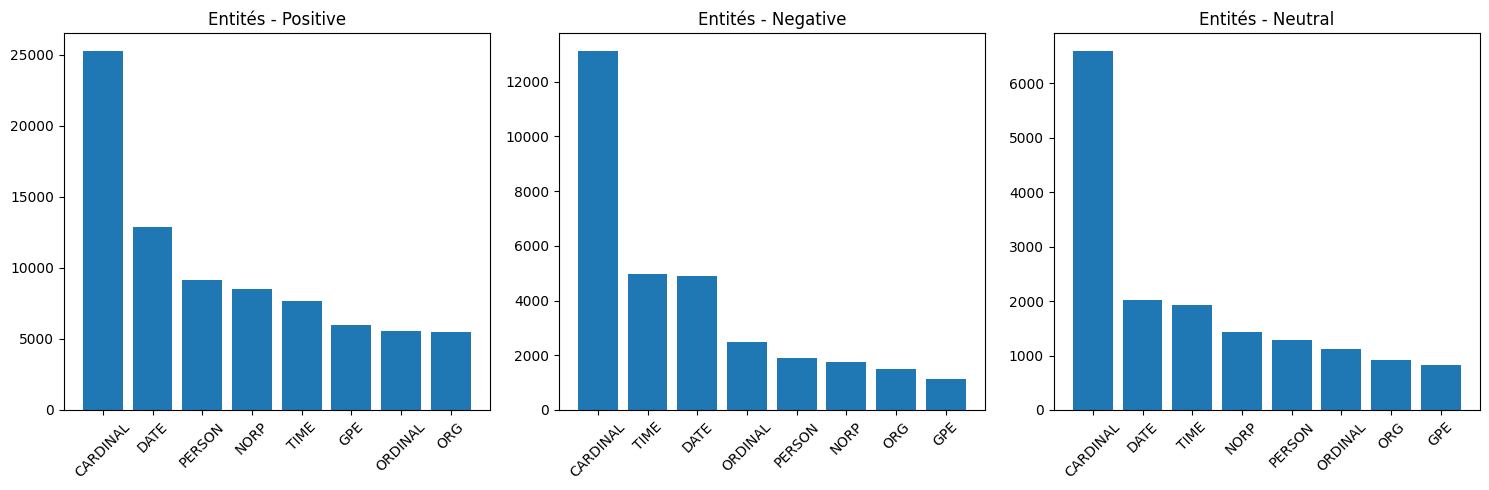

In [13]:
# Analyser les entités par sentiment
print("=== ANALYSE DES ENTITÉS PAR SENTIMENT ===\n")

sentiment_entities = defaultdict(lambda: defaultdict(list))

for i, entities in enumerate(text_entities):
    sentiment = df_reviews.iloc[i]['sentiment']
    for entity in entities:
        sentiment_entities[sentiment][entity['label']].append(entity['text'])

# Afficher les entités les plus fréquentes par sentiment
for sentiment in ['positive', 'negative', 'neutral']:
    print(f"\n--- SENTIMENT: {sentiment.upper()} ---")
    
    if sentiment in sentiment_entities:
        for label in ['ORG', 'GPE', 'PRODUCT', 'PERSON']:
            if label in sentiment_entities[sentiment]:
                entities = sentiment_entities[sentiment][label]
                entity_counts = Counter(entities)
                if entity_counts:
                    print(f"\n{label} ({spacy.explain(label)}):")
                    for entity, count in entity_counts.most_common(5):
                        print(f"  - {entity}: {count}")

# Graphique comparatif
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sentiments = ['positive', 'negative', 'neutral']

for i, sentiment in enumerate(sentiments):
    if sentiment in sentiment_entities:
        # Compter les types d'entités pour ce sentiment
        label_counts = {}
        for label, entities in sentiment_entities[sentiment].items():
            label_counts[label] = len(entities)
        
        if label_counts:
            labels, counts = zip(*sorted(label_counts.items(), key=lambda x: x[1], reverse=True)[:8])
            axes[i].bar(labels, counts)
            axes[i].set_title(f'Entités - {sentiment.title()}')
            axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- **Function for analyzing a new text**

In [14]:
def analyze_new_text(text):
    """
    Analyser un nouveau texte et extraire ses entités
    """
    print(f"=== ANALYSE NER ===")
    print(f"Texte: {text}")
    print()
    
    # Extraire les entités
    entities = extract_entities(text)
    
    if not entities:
        print("Aucune entité nommée trouvée.")
        return
    
    # Catégoriser
    categorized = categorize_entities(entities)
    
    print("ENTITÉS TROUVÉES:")
    
    if categorized['products']:
        print(f"Produits: {', '.join(set(categorized['products']))}")
    
    if categorized['locations']:
        print(f"Lieux: {', '.join(set(categorized['locations']))}")
    
    if categorized['organizations']:
        print(f"Organisations: {', '.join(set(categorized['organizations']))}")
    
    if categorized['other']:
        other_by_type = defaultdict(list)
        for text, label in categorized['other']:
            other_by_type[label].append(text)
        
        for label, texts in other_by_type.items():
            print(f"{spacy.explain(label)}: {', '.join(set(texts))}")
    
    # Visualisation
    doc = nlp(text)
    print(f"\nVISUALISATION:")
    displacy.render(doc, style="ent", jupyter=False)
    
    return entities

# Test de la fonction
test_text = "I visited McDonald's in New York last week. The Big Mac was delicious and the staff at this location was very friendly."
analyze_new_text(test_text)

=== ANALYSE NER ===
Texte: I visited McDonald's in New York last week. The Big Mac was delicious and the staff at this location was very friendly.

ENTITÉS TROUVÉES:
Lieux: New York
Organisations: McDonald's, The Big Mac
Absolute or relative dates or periods: last week

VISUALISATION:


[{'text': "McDonald's",
  'label': 'ORG',
  'description': 'Companies, agencies, institutions, etc.',
  'start': 10,
  'end': 20},
 {'text': 'New York',
  'label': 'GPE',
  'description': 'Countries, cities, states',
  'start': 24,
  'end': 32},
 {'text': 'last week',
  'label': 'DATE',
  'description': 'Absolute or relative dates or periods',
  'start': 33,
  'end': 42},
 {'text': 'The Big Mac',
  'label': 'ORG',
  'description': 'Companies, agencies, institutions, etc.',
  'start': 44,
  'end': 55}]